# Create the Best Moment Maps

From `alma_best_imaging.ipynb`, we've chosen `20 km/s Natural Weighting No Taper` as the best imaging option.
Now, in parts `1` and `2`, we create the best moment maps possible using [bettermoments](https://bettermoments.readthedocs.io/en/latest/?badge=latest). In part `3`, we create moment maps restricted to certain velocity ranges, to see if we can find velocity-coherent structure.

In [ ]:
#set path to beads folder
path_to_beads = '/Users/osaseomoruyi/Dropbox (Harvard University)/BeadsMultiwavelength/'

In [4]:
#system
import sys
from types import SimpleNamespace 

#astropy
import astropy.units as u
from astropy.coordinates import Angle
import astropy.constants as const

#matplotlib
import matplotlib.pyplot as plt

#seaborn
import seaborn as sns

#numpy
import numpy as np

from spectral_cube import SpectralCube

import importlib


In [3]:
#import modules
util_path = path_to_beads + 'Notebooks/Beads20/utils/'
sys.path.append(util_path)

import plotting_functions as pf
import science_functions as sf

In [4]:
#General Information about SDSS 1531
about_sdss1531 = SimpleNamespace(**sf.sdss1531_dict)
print(about_sdss1531)

{'name': 'SDSS J1531+3414',
 'ra': 232.7936938,
 'dec': 34.2404172,
 'radius': 2.5,
 'z': 0.335,
 'cz': 100430.47}

### 1. Create Moment Maps with different parameters to find best parameters

Below, we try a variety of values for each parameter in `bettermoments`. We vary one parameter at a time and keep the other parameters fixed. 


In [5]:
co32_file = path_to_beads + 'Analysis/almaBeads/reduced_2022/SDSS1531_CO32_20kms_natural_notaper.image.pbcor.fits'
fig_path = path_to_beads + 'Figures/paper/'

Parameter: spatial smoothing width 


Creating Moment Maps with spectral_smooth_width = 2, poly_order = 1 and spatial_smooth_width= 0.0
all moment map created.
Creating Moment Maps with spectral_smooth_width = 2, poly_order = 1 and spatial_smooth_width= 1.2
all moment map created.
Creating Moment Maps with spectral_smooth_width = 2, poly_order = 1 and spatial_smooth_width= 2.3
all moment map created.
Creating Moment Maps with spectral_smooth_width = 2, poly_order = 1 and spatial_smooth_width= 3.5
all moment map created.
Creating Moment Maps with spectral_smooth_width = 2, poly_order = 1 and spatial_smooth_width= 4.7
all moment map created.
Creating Moment Maps with spectral_smooth_width = 2, poly_order = 1 and spatial_smooth_width= 5.9
all moment map created.
Creating Moment Maps with spectral_smooth_width = 2, poly_order = 1 and spatial_smooth_width= 7.0
all moment map created.
Creating Moment Maps with spectral_smooth_width = 2, poly_order = 1 and spatial_smooth_width= 8.2
all moment map created.
Creating Moment Maps wit

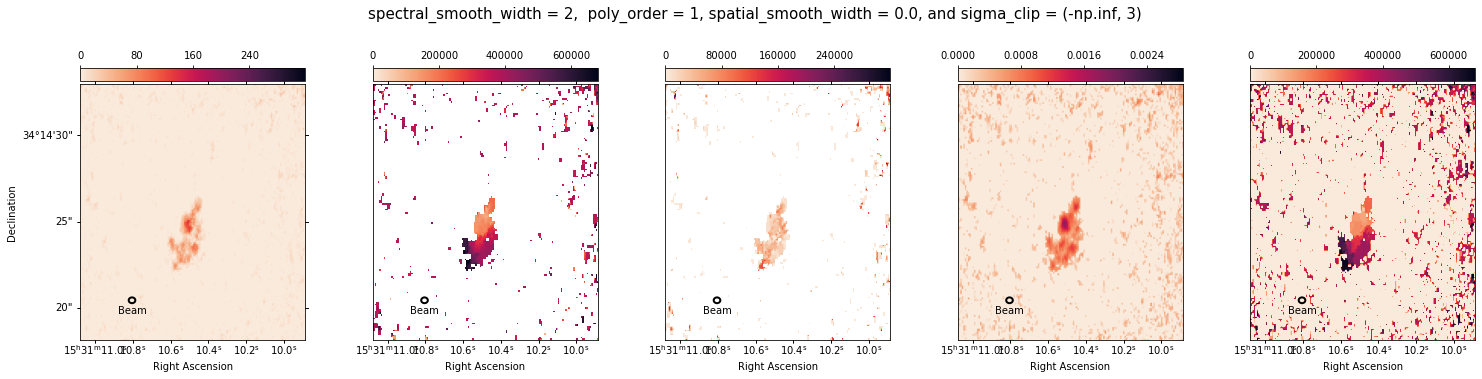

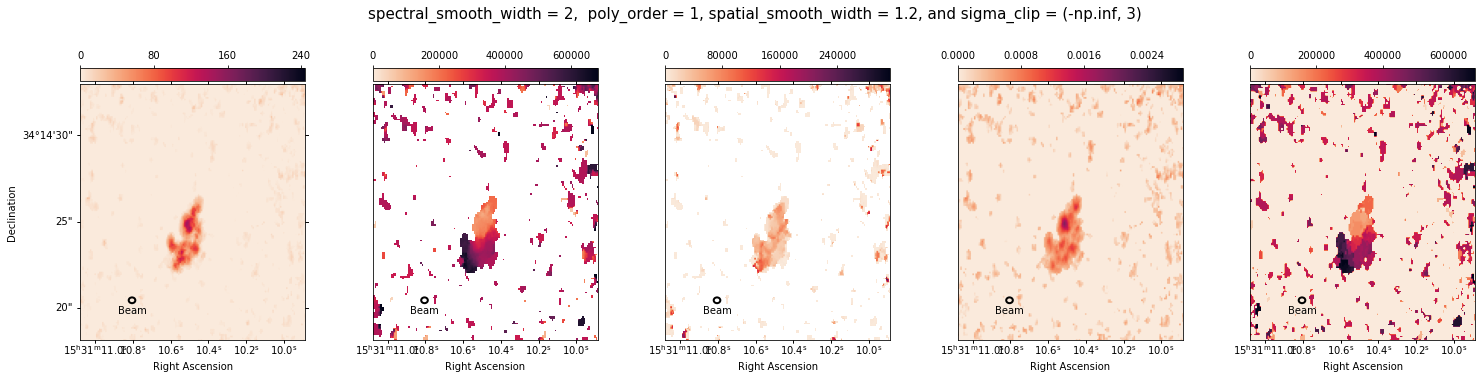

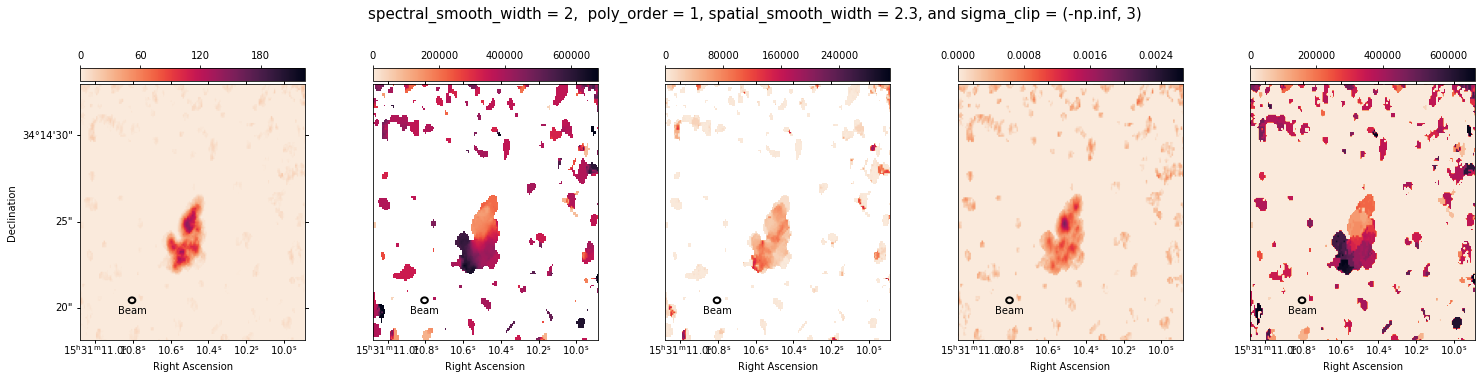

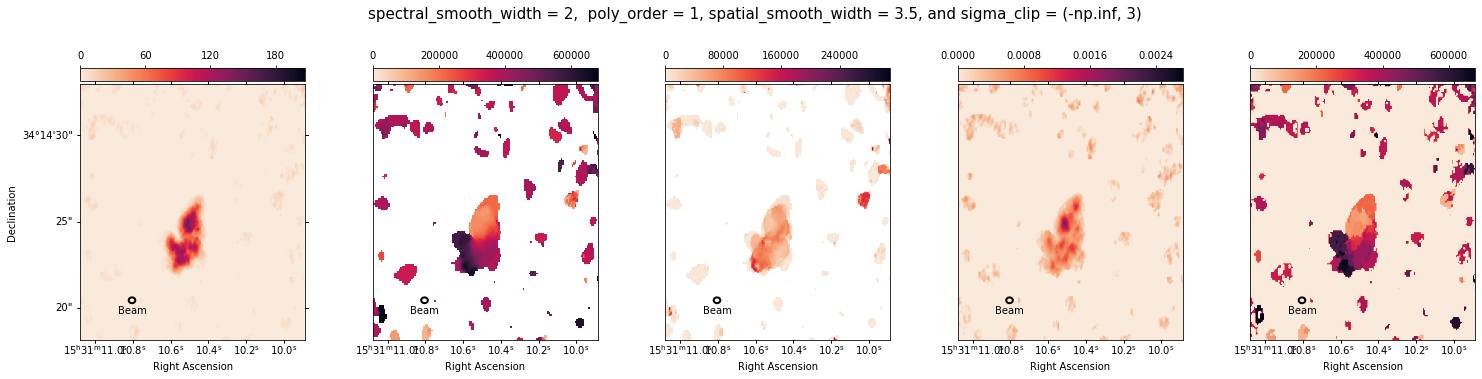

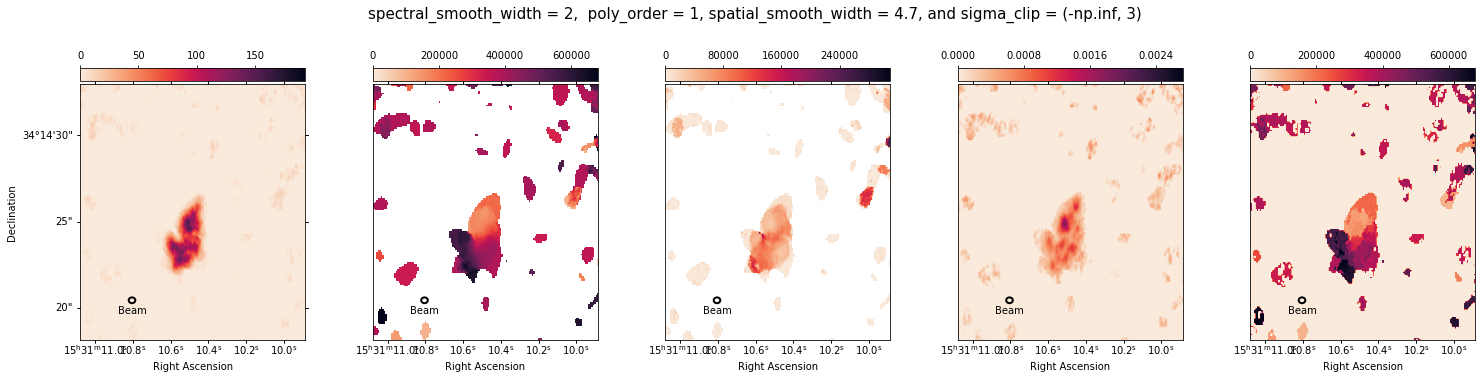

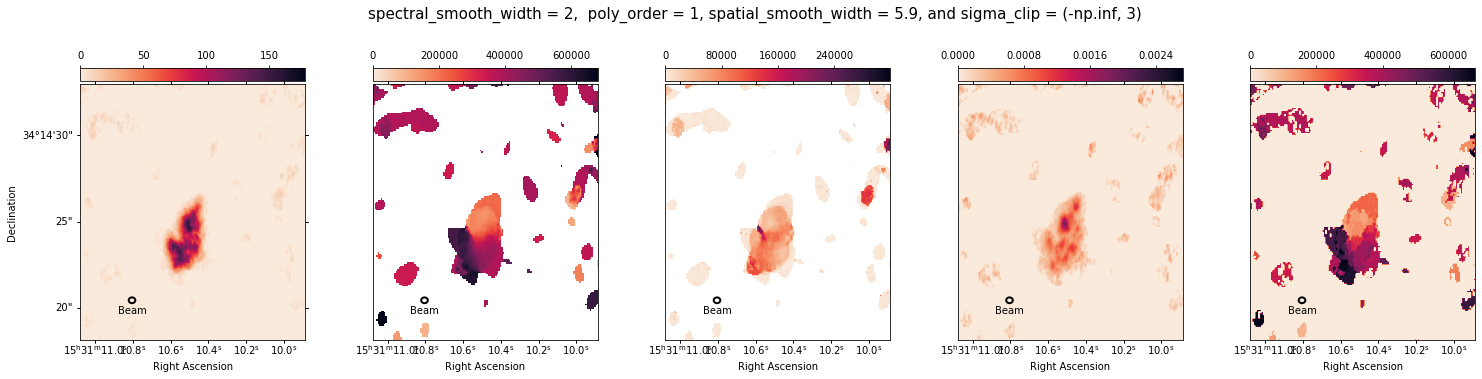

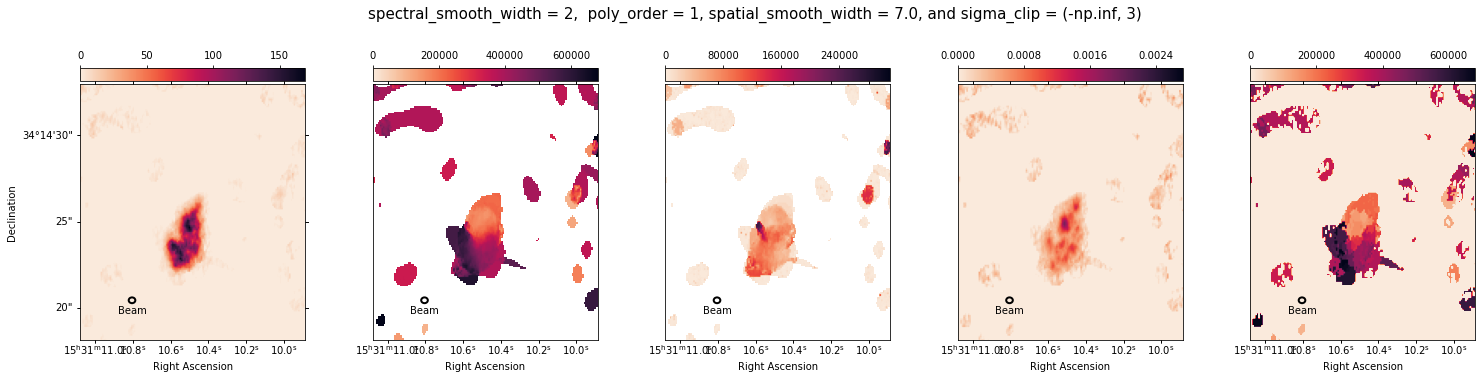

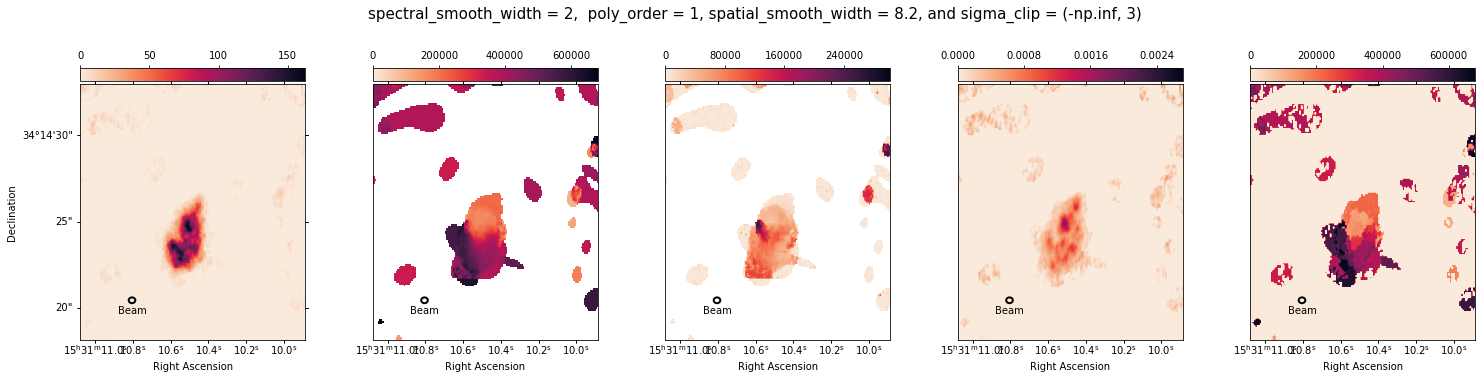

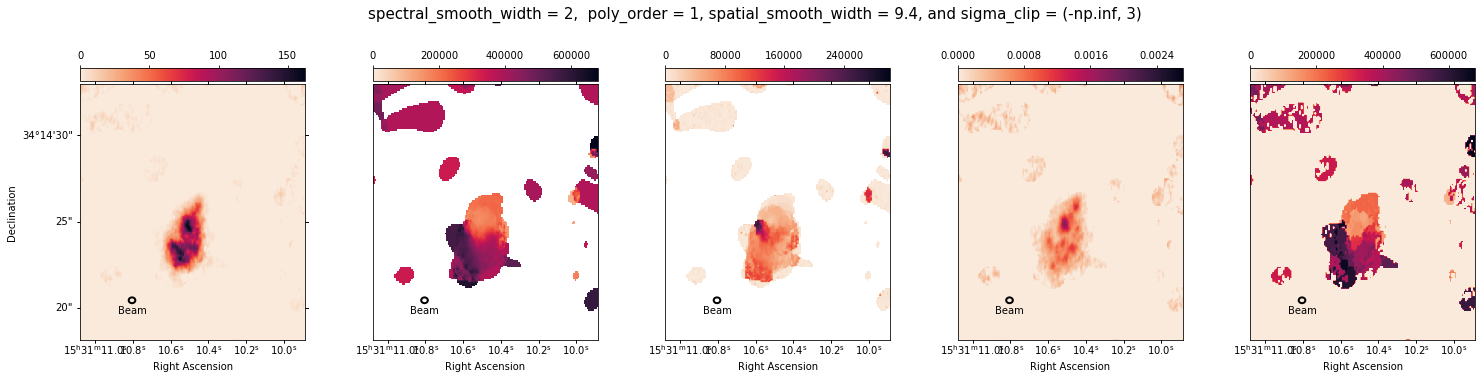

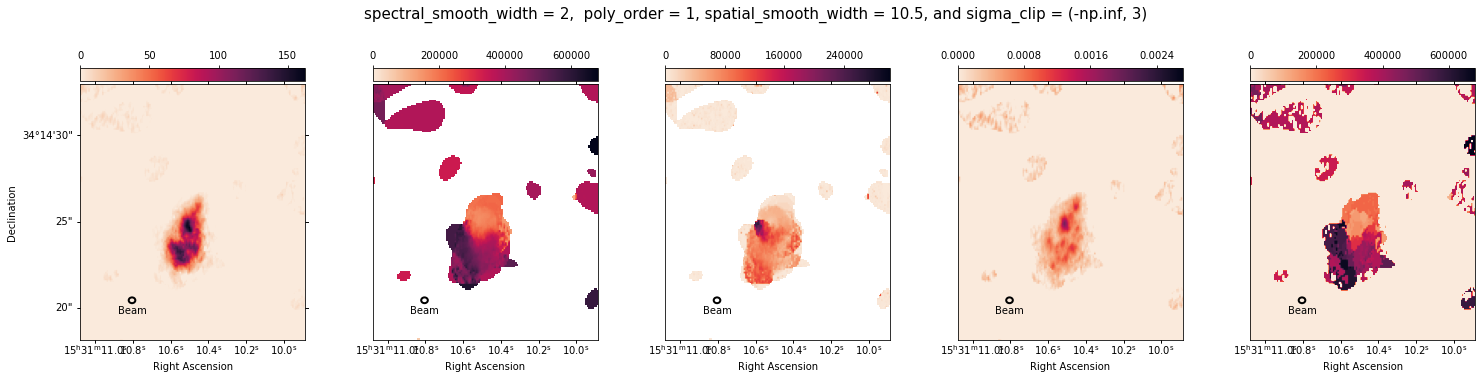

In [8]:
#fixed parameters
spectral_smooth_width = 2
poly_order = 1

hdu, hdr, w = pf.open_fits(co32_file)
beam_width = hdr['BMAJ']/hdr['CDELT2']
spatial_smooth_width = np.linspace(0, 2, 10) * beam_width

sigma_clip=3
channel_range = [36, 68]

#create moment maps

mom0_file = ''.join((path_to_beads,'Analysis/almaBeads/reduced_2022/SDSS1531_CO32_20kms_natural_notaper.image.pbcor_M0.fits'))
hdu, header, wcs = pf.open_fits(mom0_file, naxis=2)

for spatial_width in spatial_smooth_width:
        
    spatial_width = round(spatial_width, 1)

    print("Creating Moment Maps with spectral_smooth_width = {}, poly_order = {} "
            "and spatial_smooth_width= {}".format(spectral_smooth_width, poly_order, 
            spatial_width))

    moment_type = 'all'
    sf.bm_moment_maps(co32_file, moment_type=moment_type, fchannel=channel_range[0], 
                        lchannel=channel_range[1], kernel_width=spectral_smooth_width, 
                        smooth_poly_order=poly_order, thresh_mask_smooth=spatial_width, 
                        sigma_clip=sigma_clip, chatty=False)

    #plotting
    moment_filenames = [ mom0_file, ''.join((mom0_file[:-6], '1', mom0_file[-5:])), 
                        ''.join((mom0_file[:-6],'2', mom0_file[-5:])), 
                        ''.join((mom0_file[:-6],'8',mom0_file[-5:])), 
                        ''.join((mom0_file[:-6],'9',mom0_file[-5:])) ]
    
    fig = pf.plot_all_moments(moment_filenames, header)
    fig.suptitle("spectral_smooth_width = {},  poly_order = {}, spatial_smooth_width = {}, "
                    "and sigma_clip = (-np.inf, {})".format(spectral_smooth_width, 
                    poly_order, spatial_width, sigma_clip), y=1.05, fontsize=15)



    

Parameter: spectral smoothing width

Creating Moment Maps with spectral_smooth_width = 0,  poly_order = 0 and spatial_smooth_width= 2.6
all moment map created.
Creating Moment Maps with spectral_smooth_width = 1,  poly_order = 0 and spatial_smooth_width= 2.6
all moment map created.
Creating Moment Maps with spectral_smooth_width = 2,  poly_order = 0 and spatial_smooth_width= 2.6
all moment map created.
Creating Moment Maps with spectral_smooth_width = 3,  poly_order = 0 and spatial_smooth_width= 2.6
all moment map created.
Creating Moment Maps with spectral_smooth_width = 4,  poly_order = 0 and spatial_smooth_width= 2.6
all moment map created.


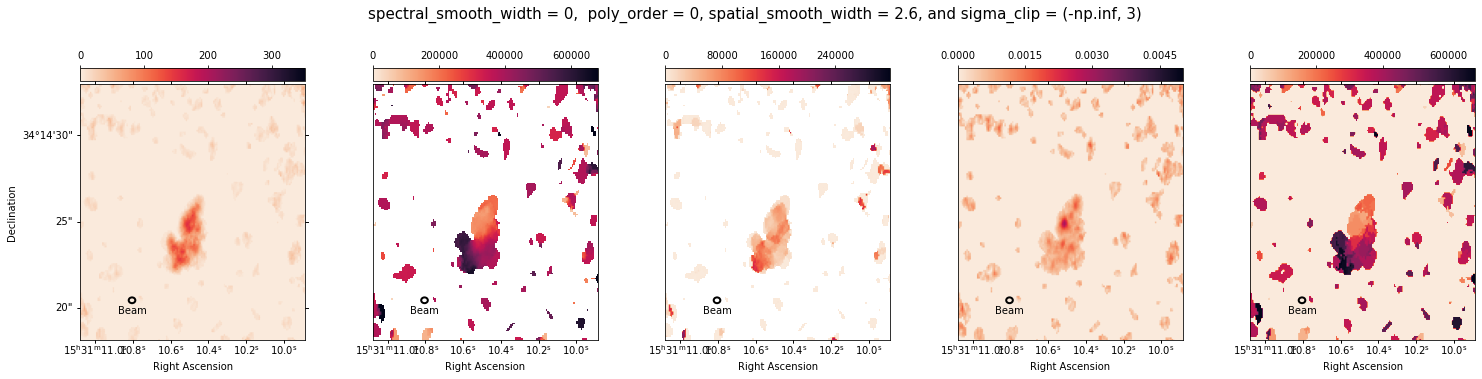

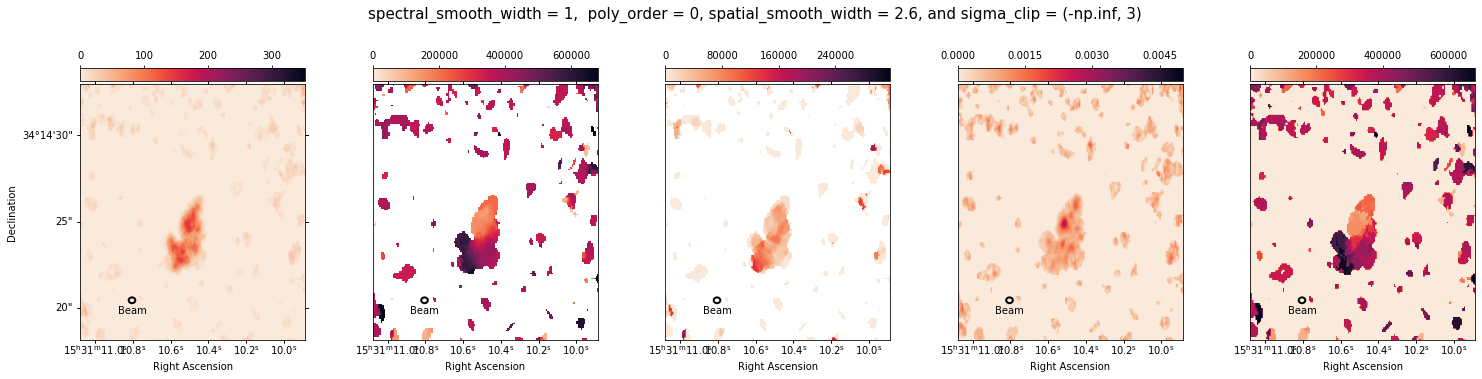

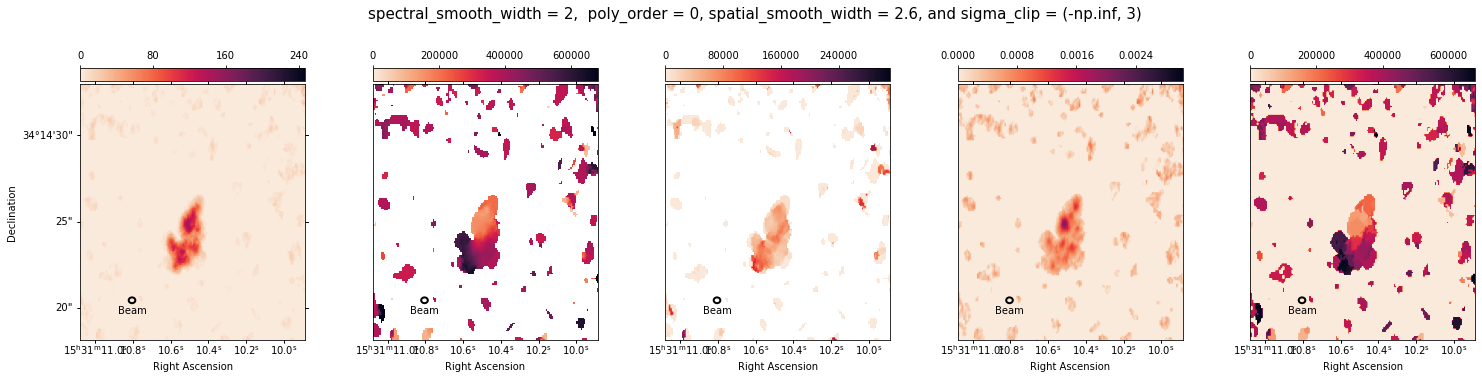

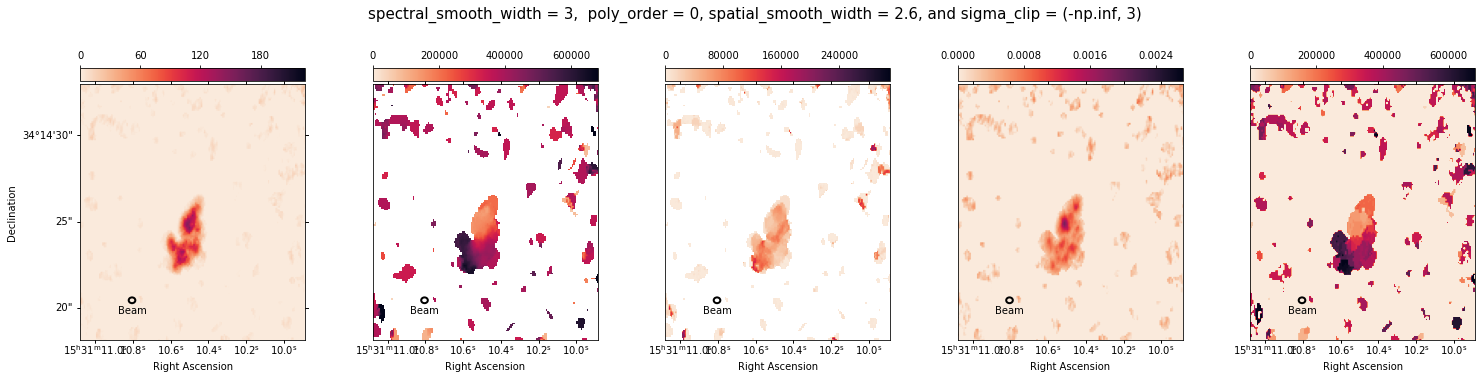

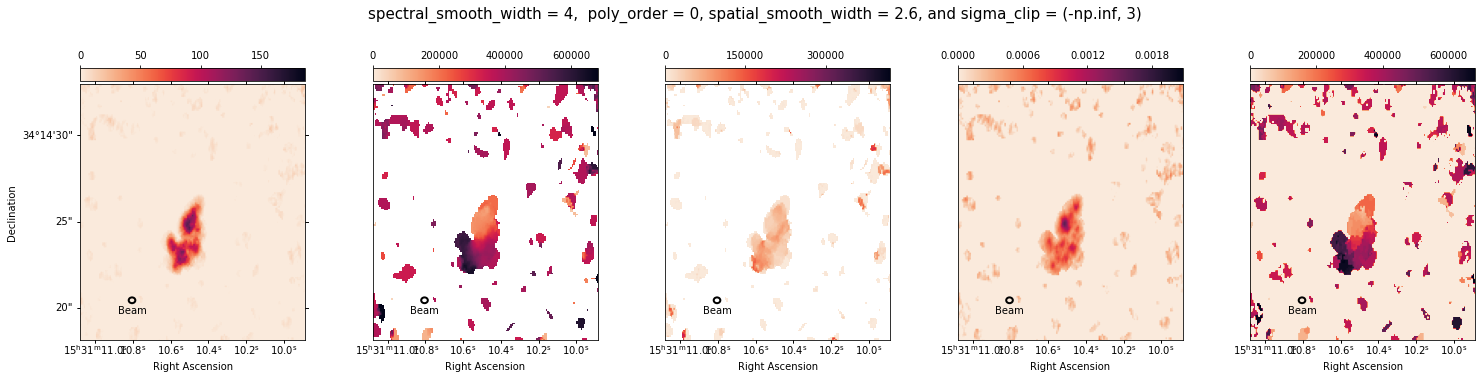

In [9]:
#fixed parameters
spectral_smooth_width = np.arange(0,5, 1)
poly_order = 0
spatial_smooth_width = 2.6
sigma_clip=3

#create moment maps
mom0_file = ''.join((path_to_beads,'Analysis/almaBeads/reduced_2022/SDSS1531_CO32_20kms_natural_notaper.image.pbcor_M0.fits'))
hdu, header, wcs = pf.open_fits(mom0_file, naxis=2)

for spectral_width in spectral_smooth_width:

    print("Creating Moment Maps with spectral_smooth_width = {},  poly_order = {} "
            "and spatial_smooth_width= {}".format(spectral_width, poly_order, 
            spatial_smooth_width))

    moment_type = 'all'
    sf.bm_moment_maps(co32_file, moment_type=moment_type, fchannel=channel_range[0], 
                        lchannel=channel_range[1], kernel_width=spectral_width, 
                        smooth_poly_order=poly_order, thresh_mask_smooth=spatial_smooth_width, 
                        sigma_clip=sigma_clip, chatty=False)

    #plot them
    moment_filenames = [ mom0_file, ''.join((mom0_file[:-6], '1', mom0_file[-5:])), 
                        ''.join((mom0_file[:-6],'2', mom0_file[-5:])), 
                        ''.join((mom0_file[:-6],'8',mom0_file[-5:])), 
                        ''.join((mom0_file[:-6],'9',mom0_file[-5:])) ]
    
    fig = pf.plot_all_moments(moment_filenames, header)
    fig.suptitle("spectral_smooth_width = {},  poly_order = {}, spatial_smooth_width = {}, "
                "and sigma_clip = (-np.inf, {})".format(spectral_width, poly_order, 
                spatial_smooth_width, sigma_clip), y=1.05, fontsize=15)



    

Parameter: max_snr in sigma_clip

Creating Moment Maps with spectral_smooth_width = 2,  poly_order = 1, spatial_smooth_width= 2.6, and sigma_clip = (-np.inf, 1.0)
all moment map created.
Creating Moment Maps with spectral_smooth_width = 2,  poly_order = 1, spatial_smooth_width= 2.6, and sigma_clip = (-np.inf, 2.0)
all moment map created.
Creating Moment Maps with spectral_smooth_width = 2,  poly_order = 1, spatial_smooth_width= 2.6, and sigma_clip = (-np.inf, 3.0)
all moment map created.
Creating Moment Maps with spectral_smooth_width = 2,  poly_order = 1, spatial_smooth_width= 2.6, and sigma_clip = (-np.inf, 4.0)
all moment map created.
Creating Moment Maps with spectral_smooth_width = 2,  poly_order = 1, spatial_smooth_width= 2.6, and sigma_clip = (-np.inf, 5.0)
all moment map created.


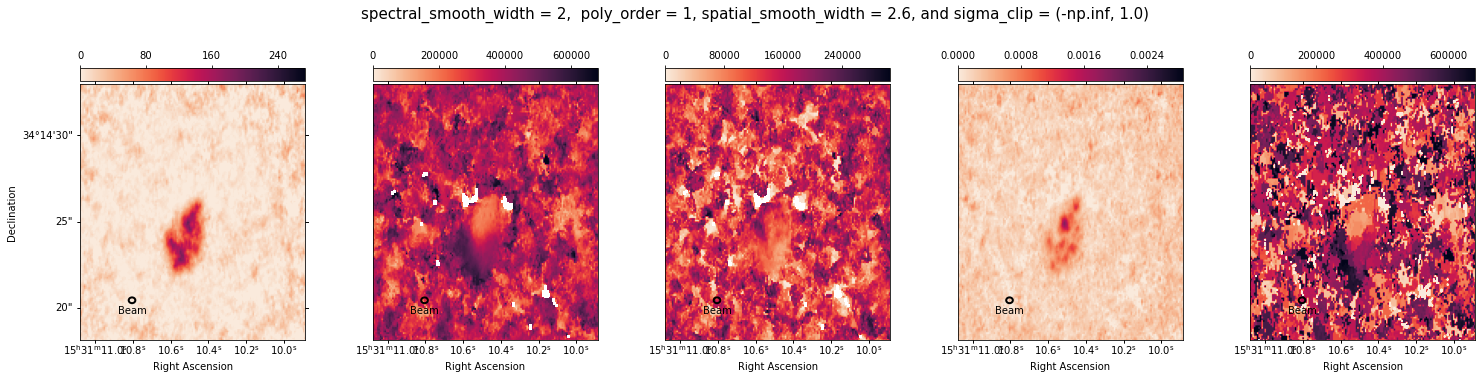

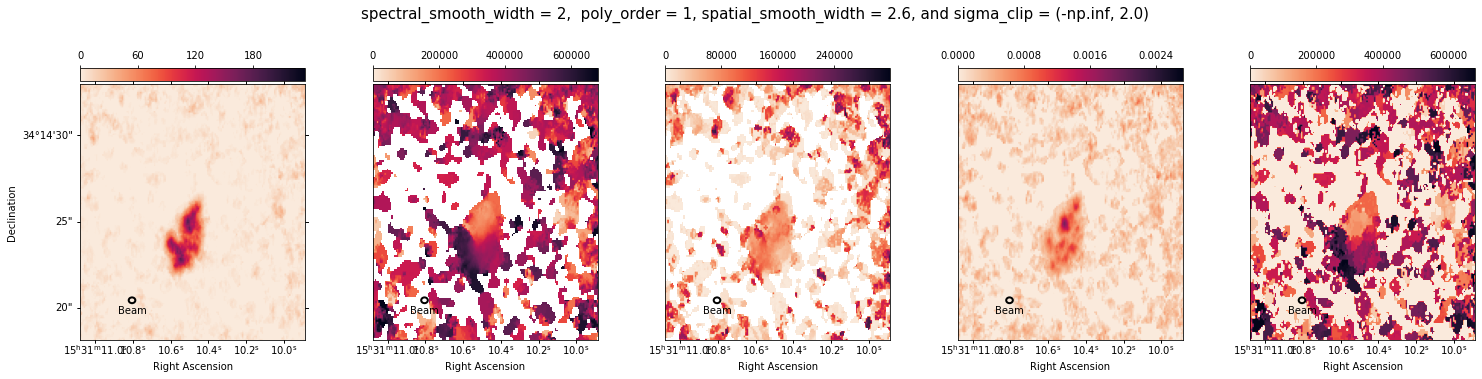

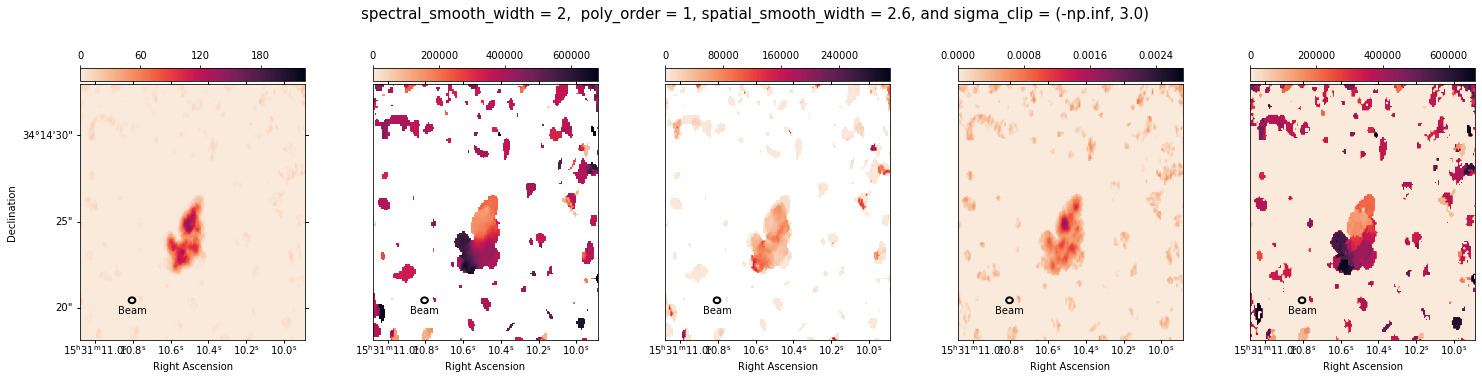

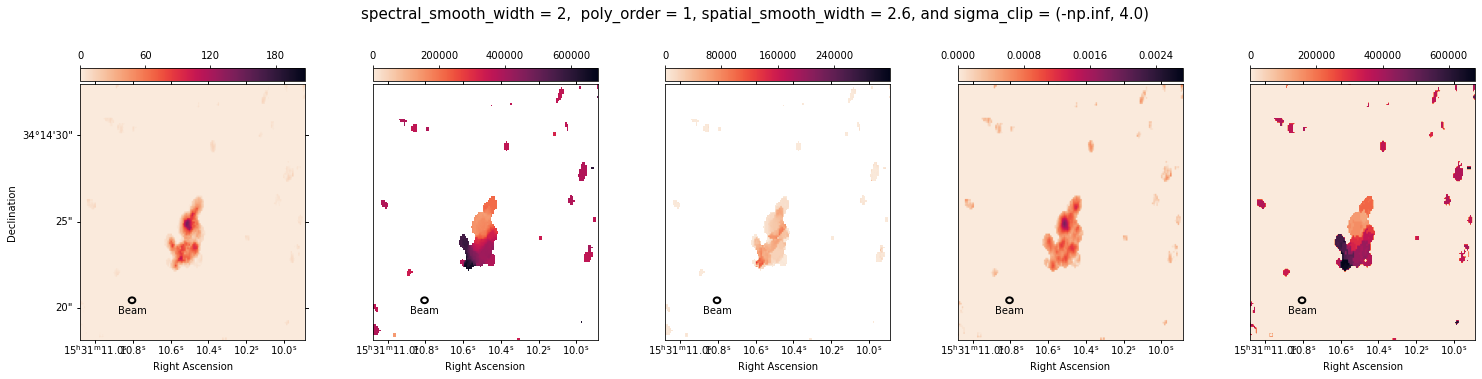

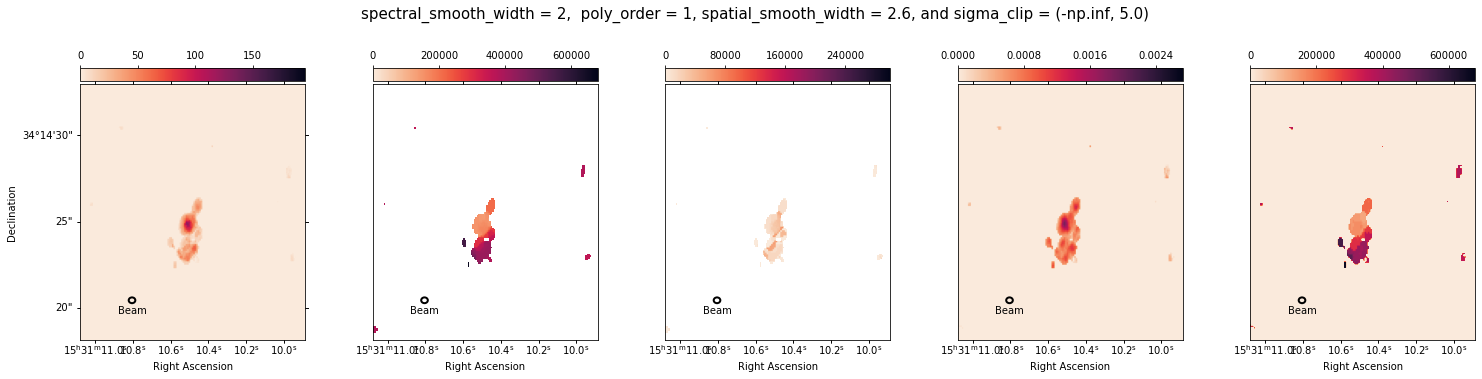

In [10]:
#fixed parameters
spectral_smooth_width = 2
poly_order = 1
spatial_smooth_width = 2.6
sigma_clip=np.linspace(1,5, 5)

#create moment map
mom0_file = ''.join((path_to_beads,'Analysis/almaBeads/reduced_2022/SDSS1531_CO32_20kms_natural_notaper.image.pbcor_M0.fits'))
hdu, header, wcs = pf.open_fits(mom0_file, naxis=2)

for sc in sigma_clip:

    print("Creating Moment Maps with spectral_smooth_width = {},  poly_order = {}, "
            "spatial_smooth_width= {}, and sigma_clip = (-np.inf, {})".format(spectral_smooth_width, 
            poly_order, spatial_smooth_width, sc))

    # moment_type = 'all'
    sf.bm_moment_maps(co32_file, moment_type=moment_type, fchannel=channel_range[0], lchannel=channel_range[1], 
                        kernel_width=spectral_smooth_width, smooth_poly_order=poly_order, 
                        thresh_mask_smooth=spatial_smooth_width, sigma_clip=sc, chatty=False)

    #plot them
    moment_filenames = [ mom0_file, ''.join((mom0_file[:-6], '1', mom0_file[-5:])), 
                        ''.join((mom0_file[:-6],'2', mom0_file[-5:])), 
                        ''.join((mom0_file[:-6],'8',mom0_file[-5:])), 
                        ''.join((mom0_file[:-6],'9',mom0_file[-5:])) ]
    
    fig = pf.plot_all_moments(moment_filenames, header)
    fig.suptitle("spectral_smooth_width = {},  poly_order = {}, spatial_smooth_width = {}, and "
                    "sigma_clip = (-np.inf, {})".format(spectral_smooth_width, poly_order, 
                    spatial_smooth_width, sc), y=1.05, fontsize=15)

Parameter: poly_order

Creating Moment Maps with spectral_smooth_width = 2,  poly_order = 0 and spatial_smooth_width= 2.6
all moment map created.
Creating Moment Maps with spectral_smooth_width = 2,  poly_order = 1 and spatial_smooth_width= 2.6
all moment map created.
Creating Moment Maps with spectral_smooth_width = 2,  poly_order = 2 and spatial_smooth_width= 2.6
all moment map created.


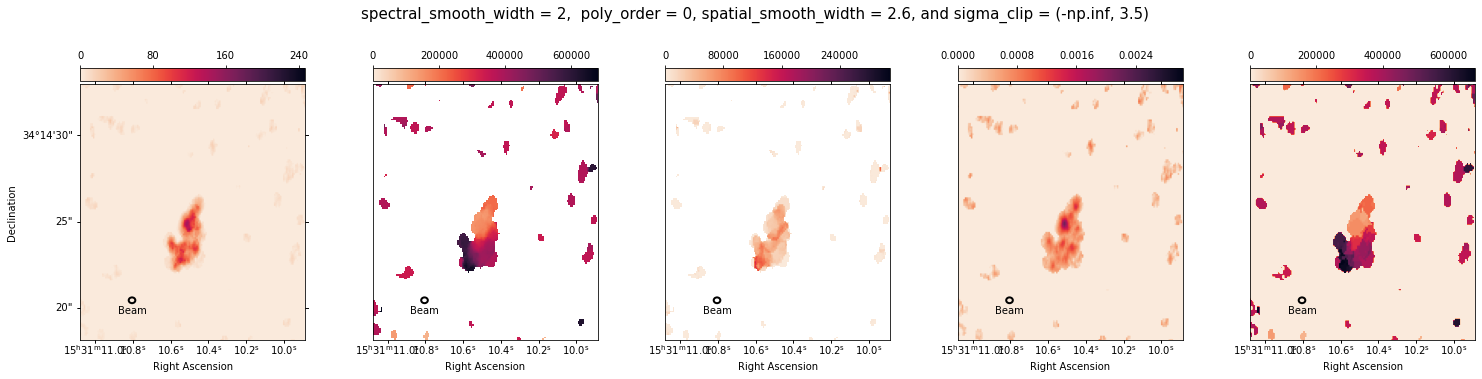

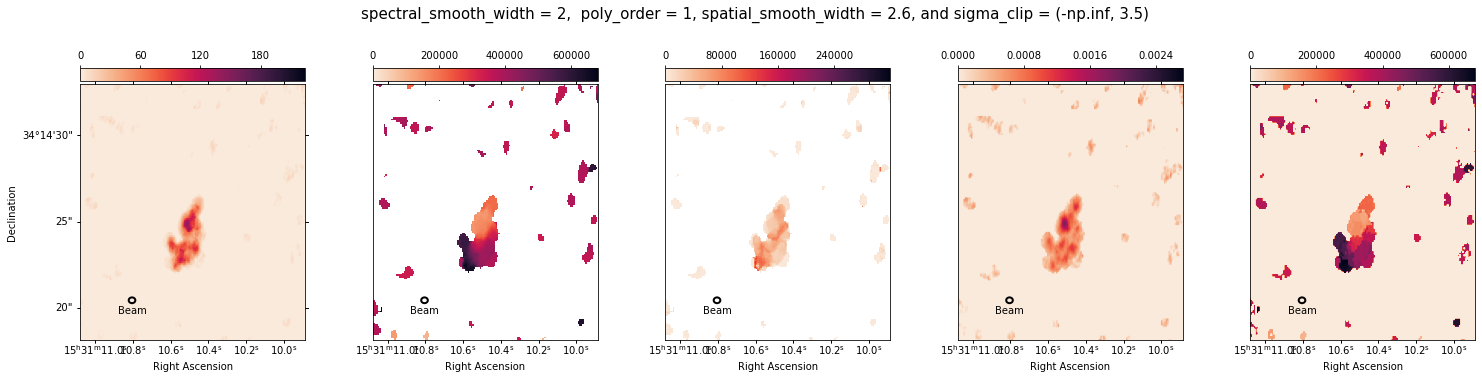

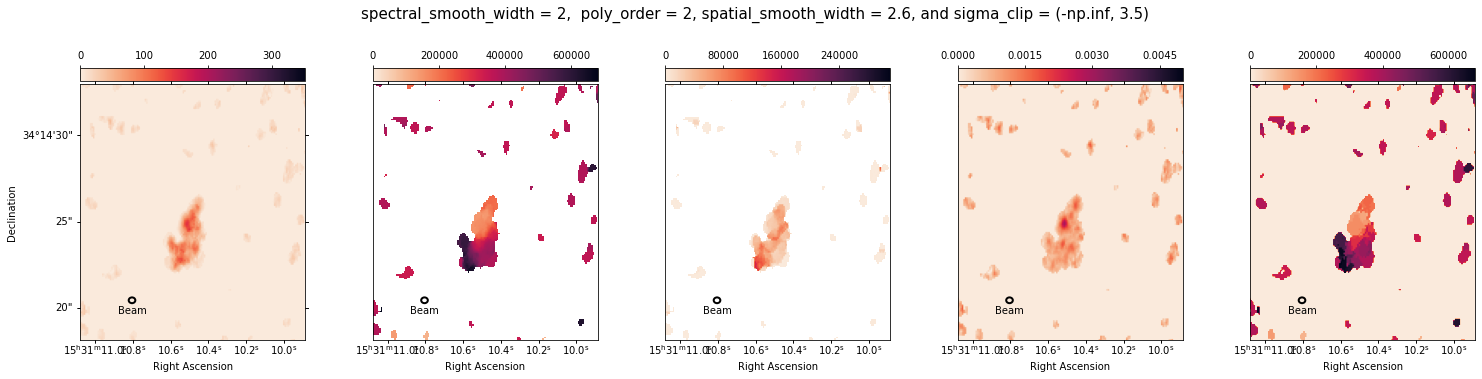

In [11]:
#fixed parameters
spectral_smooth_width = 2
poly_order = np.arange(0,spectral_smooth_width + 1, 1)
spatial_smooth_width = 2.6
sigma_clip=3.5

#create moment maps
mom0_file = ''.join((path_to_beads,'Analysis/almaBeads/reduced_2022/SDSS1531_CO32_20kms_natural_notaper.image.pbcor_M0.fits'))
hdu, header, wcs = pf.open_fits(mom0_file, naxis=2)

for porder in poly_order:

    print("Creating Moment Maps with spectral_smooth_width = {},  poly_order = {} "
            "and spatial_smooth_width= {}".format(spectral_smooth_width, porder, 
            spatial_smooth_width))

    # moment_type = 'all'
    sf.bm_moment_maps(co32_file, moment_type=moment_type, fchannel=channel_range[0], 
                        lchannel=channel_range[1], kernel_width=spectral_smooth_width, 
                        smooth_poly_order=porder, thresh_mask_smooth=spatial_smooth_width, 
                        sigma_clip=sigma_clip, chatty=False)

    #plot them
    moment_filenames = [ mom0_file, ''.join((mom0_file[:-6], '1', mom0_file[-5:])), 
                        ''.join((mom0_file[:-6],'2', mom0_file[-5:])), 
                        ''.join((mom0_file[:-6],'8',mom0_file[-5:])), 
                        ''.join((mom0_file[:-6],'9',mom0_file[-5:])) ]
    
    fig = pf.plot_all_moments(moment_filenames, header)
    fig.suptitle("spectral_smooth_width = {},  poly_order = {}, spatial_smooth_width = {}, and "
                "sigma_clip = (-np.inf, {})".format(spectral_smooth_width, porder, spatial_smooth_width, 
                sigma_clip), y=1.05, fontsize=15)

### 2. Plot Winning Combo

The winning combo seems to be:

spectral_smooth_width=2

poly_order=0

sigma_clip=3.5

spatial_smooth_width=2.6


In [21]:
spectral_smooth_width=2
poly_order=0
spatial_smooth_width=2.6
sigma_clip=3.5
moment_type='all'
channel_range=[37, 68]

sf.bm_moment_maps(co32_file, moment_type=moment_type, fchannel=channel_range[0], 
                    lchannel=channel_range[1], kernel_width=spectral_smooth_width, 
                    smooth_poly_order=poly_order, thresh_mask_smooth=spatial_smooth_width, 
                    sigma_clip=sigma_clip)


..spectrally smoothing the data with top hat kernel {} channels  wide and applying a Savitzky-Golay filter using polynomial of  order 2...
... estimating rms of the line free channels located in the first 5 and last 5 channels of the data cube
RMS = 0.215 mJy/beam (original)
RMS = 0.135 mJy/beam (smoothed)
... no user masking...
...applying a sigma clip to all pixels with SN < {} sigma but we will first  spatially smooth the data by 3.5 pixels...
... selecting channels only between 37 and 68...
...combining all masks...
... creating all moment....
all moment map created.


Text(0.5, 1.05, 'spectral_smooth_width = 2,  poly_order = 0, spatial_smooth_width = 10.5, and sigma_clip = (-np.inf, 3.5)')

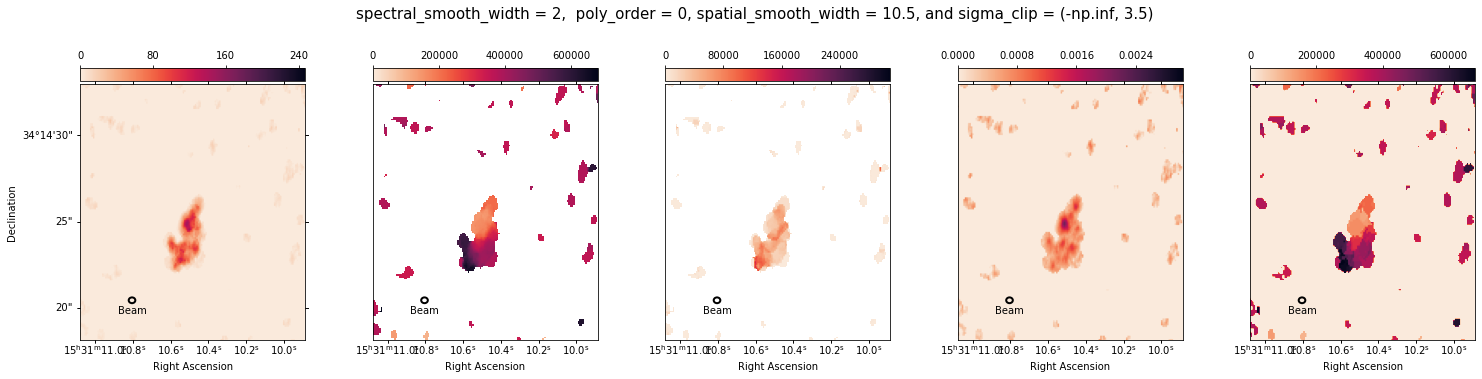

In [31]:
mom0_file = ''.join((path_to_beads,'Analysis/almaBeads/reduced_2022/SDSS1531_CO32_20kms_natural_notaper.image.pbcor_M0.fits'))
moment_filenames = [ mom0_file, ''.join((mom0_file[:-6], '1', mom0_file[-5:])), 
                    ''.join((mom0_file[:-6],'2', mom0_file[-5:])), 
                    ''.join((mom0_file[:-6],'8',mom0_file[-5:])), 
                    ''.join((mom0_file[:-6],'9',mom0_file[-5:])) ]

hdu, header, wcs = pf.open_fits(mom0_file, naxis=2)

fig = pf.plot_all_moments(moment_filenames, header)
fig.suptitle("spectral_smooth_width = {},  poly_order = {}, spatial_smooth_width = {}, "
                "and sigma_clip = (-np.inf, {})".format(spectral_smooth_width, 
                poly_order, spatial_width, sigma_clip), y=1.05, fontsize=15)

### 3. Create Moment Maps Covering Different Velocity Ranges


Creating Moment Map from Channels 38-48
all moment map created.
Creating Moment Map from Channels 49-58
all moment map created.
Creating Moment Map from Channels 59-69
all moment map created.


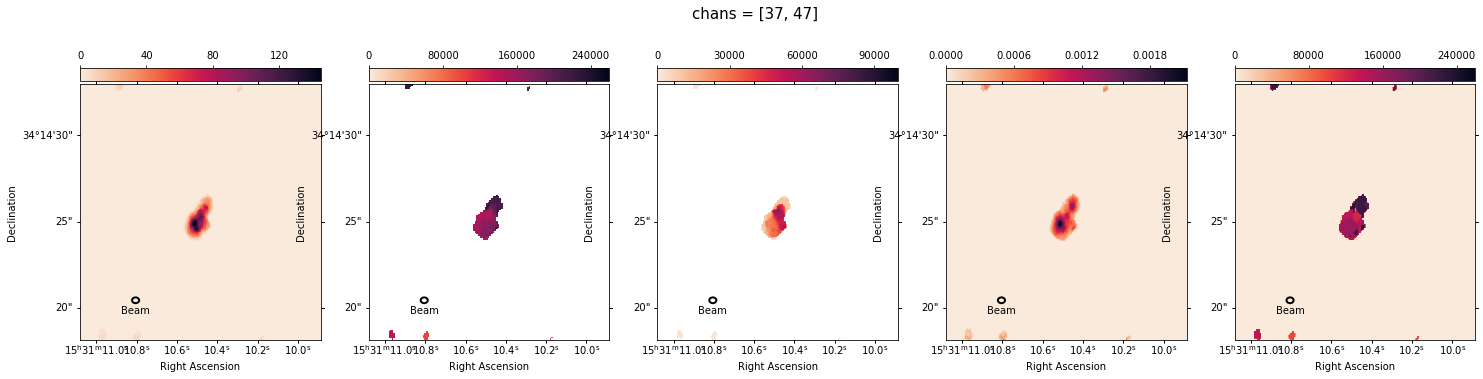

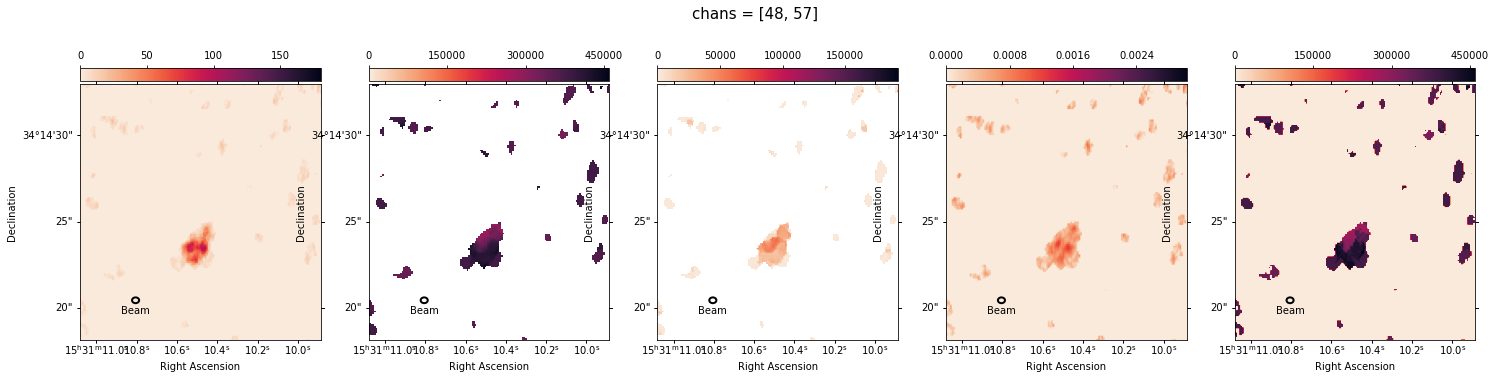

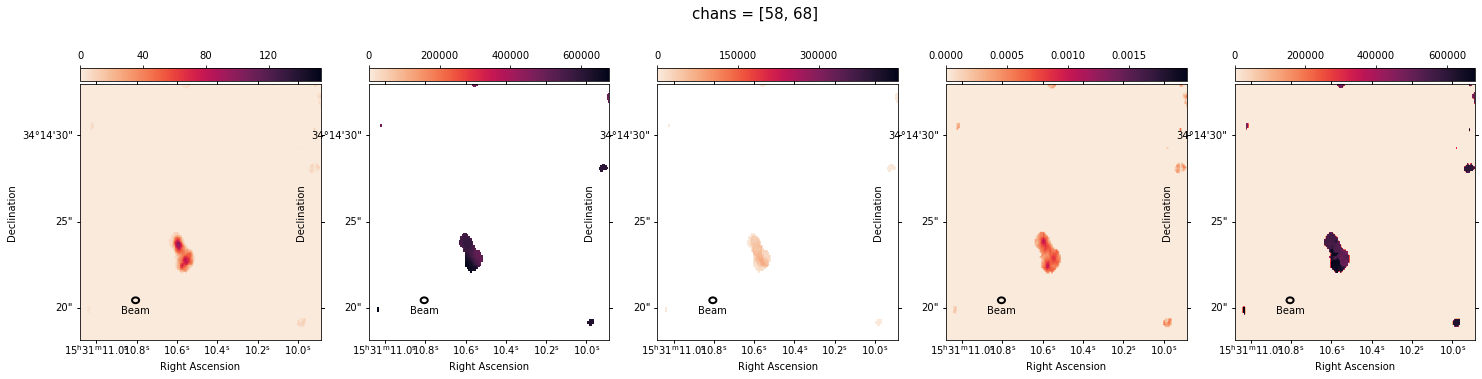

In [19]:
#channel ranges determined from 20 km/s cube
channel_ranges = [[37,47], [48, 57], [58, 68]]

#create moments
spectral_smooth_width=2
poly_order=0
spatial_smooth_width=2.6
sigma_clip=3.5
moment_type='all'

mom0_file = ''.join((path_to_beads,'Analysis/almaBeads/reduced_2022/SDSS1531_CO32_20kms_natural_notaper.image.pbcor_M0.fits'))
moment_filenames = [ mom0_file, ''.join((mom0_file[:-6], '1', mom0_file[-5:])), 
                    ''.join((mom0_file[:-6],'2', mom0_file[-5:])), 
                    ''.join((mom0_file[:-6],'8',mom0_file[-5:])), 
                    ''.join((mom0_file[:-6],'9',mom0_file[-5:])) ]

hdu, header, wcs = pf.open_fits(mom0_file, naxis=2)

for channel_range in channel_ranges:

    print("Creating Moment Map from Channels {}-{}".format(channel_range[0]+1, channel_range[1]+1))

    sf.bm_moment_maps(co32_file, moment_type=moment_type, fchannel=channel_range[0], lchannel=channel_range[1], 
                        kernel_width=spectral_smooth_width, smooth_poly_order=poly_order, 
                        thresh_mask_smooth=spatial_smooth_width, sigma_clip=sigma_clip, chatty=False)

    #plot
    fig = pf.plot_all_moments(moment_filenames, header)
    fig.suptitle("chans = [{}, {}]".format(channel_range[0], channel_range[1]), y=1.05, fontsize=15)


#### There appear to be 3 spatially coincident filamentary/ clumpy structures in velocity space. A northern filament, a central clump, and a southern filament
